In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from torch import nn
from torchvision.utils import save_image
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets
import torchvision.transforms as T
import torchvision.models as models
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
IP_dir = '/kaggle/input/odir-5k-resnet/Augmented_Imgs'
transform = T.Compose([T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset = datasets.ImageFolder(
    root := IP_dir,
    transform = transform
)

In [3]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])
batch_size = 32
train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
device = "cuda"

In [4]:
def train(model, dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        temp.append(loss.detach().cpu().numpy())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch%100 == 0:
            loss, current = loss.item(), batch*len(x)
            print(f"Loss:{loss:>7f} [{current:>5d}/{size:>5d}]")
    Train_Loss.append(np.mean(temp))

In [5]:
prevAcc = 0.0
def test(model, dataloader, loss_fn):
    size = len(dataloader.dataset)
    batch_num = len(dataloader)
    model.eval()

    test_loss, correct = 0,0
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= batch_num
    Test_Loss.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    global prevAcc
    if prevAcc < correct:
        ######
        name = "resnet101_v2.pth"
        torch.save(resnet101.state_dict(), name)
        ######
        print("Saved Successfully!!\n")
        prevAcc = correct

In [6]:
num_classes = 6
resnet101 = models.resnet101(pretrained=True)
for param in resnet101.parameters():
    param.requires_grad = True
resnet101.fc = nn.Sequential(
    nn.Linear(resnet101.fc.in_features, num_classes),
    nn.Softmax()
)
resnet101_optimizer = torch.optim.Adam(resnet101.parameters(), lr=1e-3)
resnet101 = resnet101.to(device)
loss_fn = nn.CrossEntropyLoss()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 89.2MB/s] 


Epoch:1
-----------------------


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss:1.804561 [    0/ 8493]
Loss:1.776897 [ 3200/ 8493]
Loss:1.639222 [ 6400/ 8493]
Test Error: 
 Accuracy: 29.9%, Avg loss: 1.708734 

Saved Successfully!!



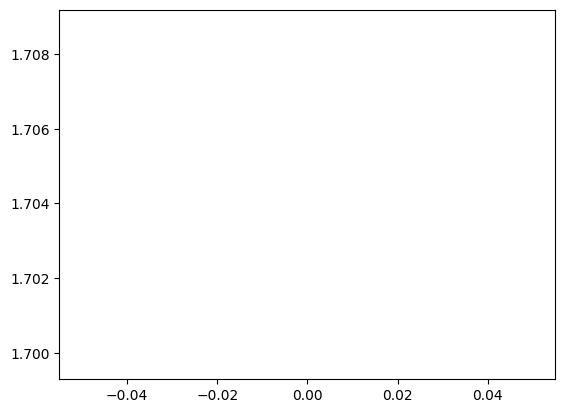

Epoch:2
-----------------------
Loss:1.579038 [    0/ 8493]
Loss:1.579069 [ 3200/ 8493]
Loss:1.683566 [ 6400/ 8493]
Test Error: 
 Accuracy: 26.9%, Avg loss: 1.763619 



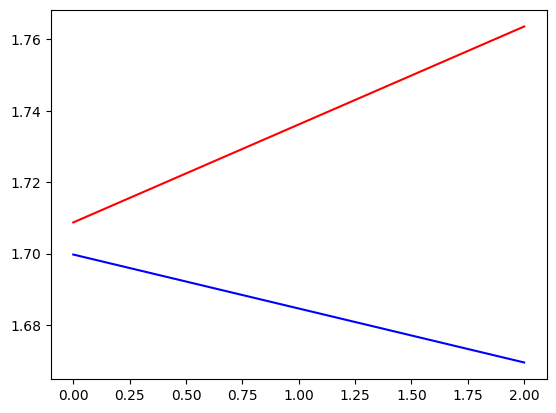

Epoch:3
-----------------------
Loss:1.631227 [    0/ 8493]
Loss:1.583110 [ 3200/ 8493]
Loss:1.510265 [ 6400/ 8493]
Test Error: 
 Accuracy: 45.6%, Avg loss: 1.579491 

Saved Successfully!!



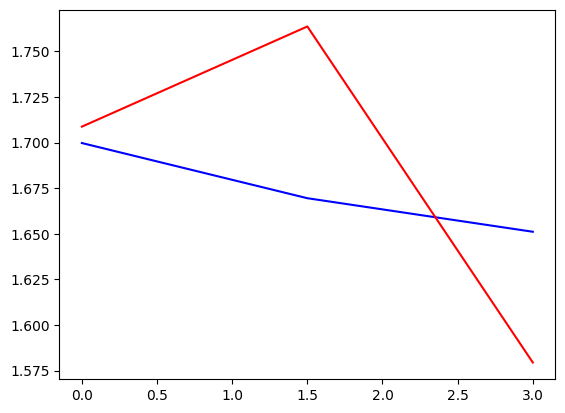

Epoch:4
-----------------------
Loss:1.559527 [    0/ 8493]
Loss:1.490481 [ 3200/ 8493]
Loss:1.501775 [ 6400/ 8493]
Test Error: 
 Accuracy: 21.2%, Avg loss: 1.832505 



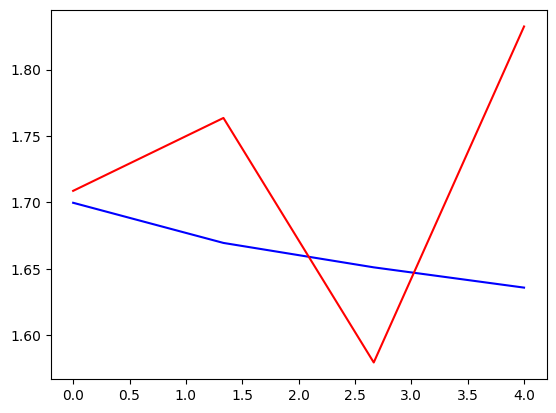

Epoch:5
-----------------------
Loss:1.629972 [    0/ 8493]
Loss:1.599426 [ 3200/ 8493]
Loss:1.616528 [ 6400/ 8493]
Test Error: 
 Accuracy: 44.1%, Avg loss: 1.600126 



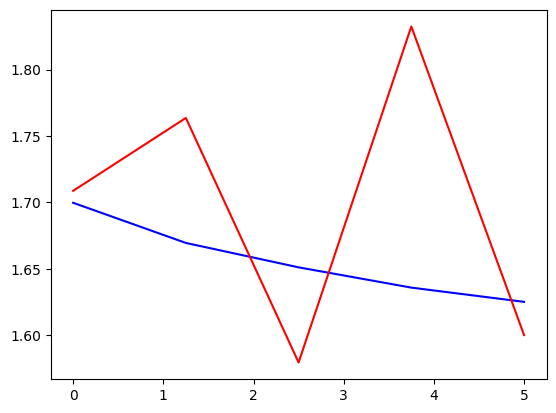

Epoch:6
-----------------------
Loss:1.508385 [    0/ 8493]
Loss:1.508446 [ 3200/ 8493]
Loss:1.540021 [ 6400/ 8493]
Test Error: 
 Accuracy: 38.7%, Avg loss: 1.646089 



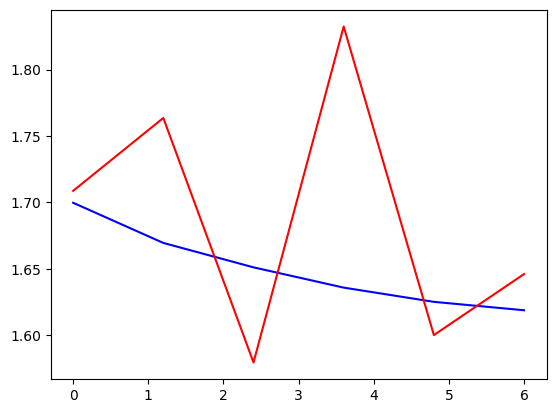

Epoch:7
-----------------------
Loss:1.703869 [    0/ 8493]
Loss:1.529119 [ 3200/ 8493]
Loss:1.742334 [ 6400/ 8493]
Test Error: 
 Accuracy: 46.0%, Avg loss: 1.578727 

Saved Successfully!!



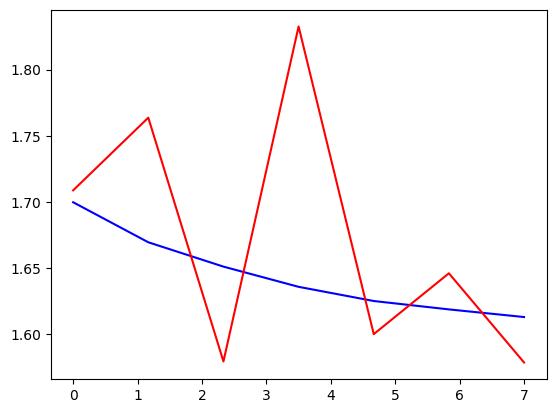

Epoch:8
-----------------------
Loss:1.503075 [    0/ 8493]
Loss:1.571324 [ 3200/ 8493]
Loss:1.498095 [ 6400/ 8493]
Test Error: 
 Accuracy: 19.6%, Avg loss: 1.848659 



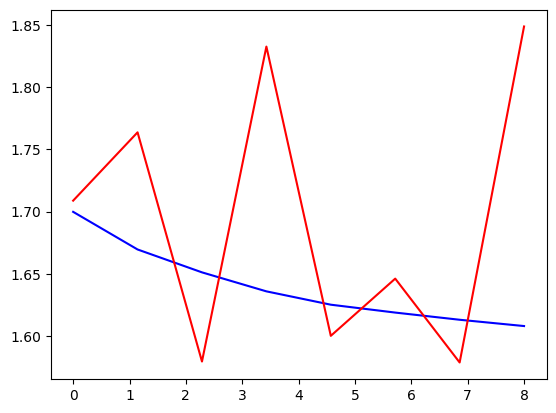

Epoch:9
-----------------------
Loss:1.464034 [    0/ 8493]
Loss:1.522712 [ 3200/ 8493]
Loss:1.492794 [ 6400/ 8493]
Test Error: 
 Accuracy: 44.5%, Avg loss: 1.582929 



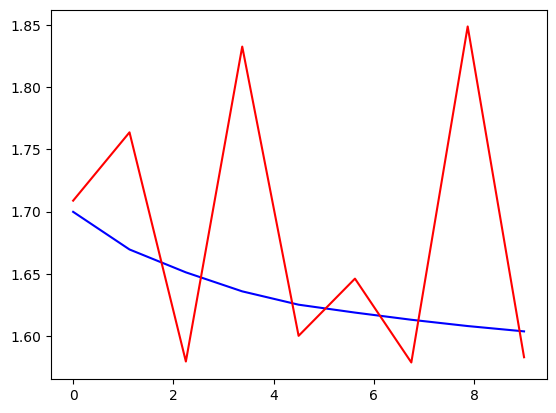

Epoch:10
-----------------------
Loss:1.470841 [    0/ 8493]
Loss:1.714685 [ 3200/ 8493]
Loss:1.582276 [ 6400/ 8493]
Test Error: 
 Accuracy: 44.3%, Avg loss: 1.588327 



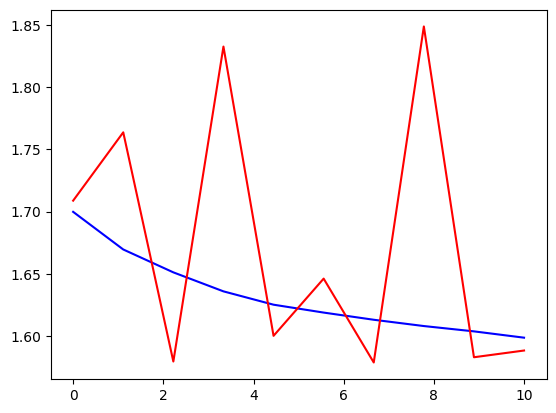

Epoch:11
-----------------------
Loss:1.437552 [    0/ 8493]
Loss:1.487960 [ 3200/ 8493]
Loss:1.544589 [ 6400/ 8493]
Test Error: 
 Accuracy: 50.9%, Avg loss: 1.533610 

Saved Successfully!!



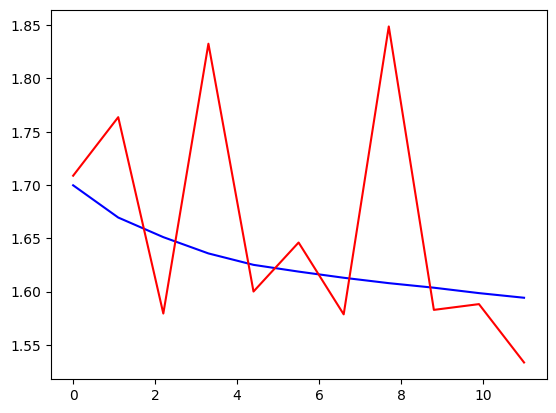

Epoch:12
-----------------------
Loss:1.546565 [    0/ 8493]
Loss:1.438769 [ 3200/ 8493]
Loss:1.563519 [ 6400/ 8493]
Test Error: 
 Accuracy: 46.9%, Avg loss: 1.570161 



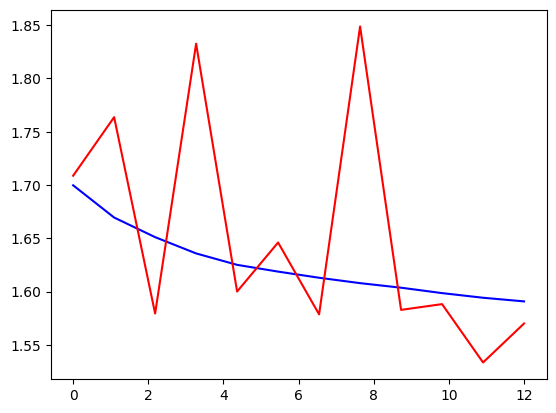

Epoch:13
-----------------------
Loss:1.704661 [    0/ 8493]
Loss:1.534874 [ 3200/ 8493]
Loss:1.543635 [ 6400/ 8493]
Test Error: 
 Accuracy: 48.5%, Avg loss: 1.553014 



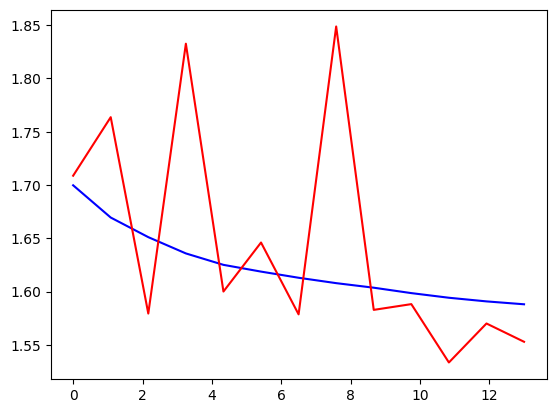

Epoch:14
-----------------------
Loss:1.589249 [    0/ 8493]
Loss:1.505369 [ 3200/ 8493]
Loss:1.475543 [ 6400/ 8493]
Test Error: 
 Accuracy: 47.3%, Avg loss: 1.557603 



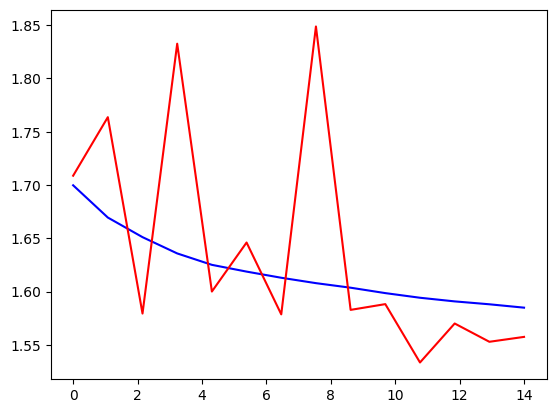

Epoch:15
-----------------------
Loss:1.551753 [    0/ 8493]
Loss:1.593712 [ 3200/ 8493]
Loss:1.560555 [ 6400/ 8493]
Test Error: 
 Accuracy: 31.4%, Avg loss: 1.725995 



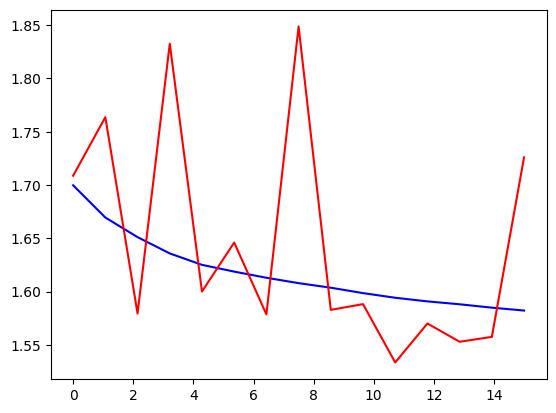

Epoch:16
-----------------------
Loss:1.498760 [    0/ 8493]
Loss:1.531510 [ 3200/ 8493]
Loss:1.561253 [ 6400/ 8493]
Test Error: 
 Accuracy: 51.1%, Avg loss: 1.530915 

Saved Successfully!!



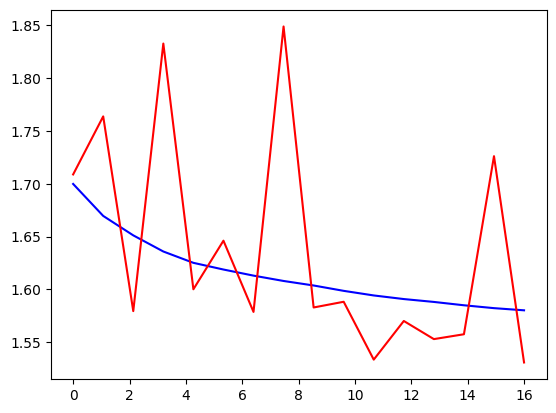

Epoch:17
-----------------------
Loss:1.458284 [    0/ 8493]
Loss:1.518454 [ 3200/ 8493]
Loss:1.583999 [ 6400/ 8493]
Test Error: 
 Accuracy: 51.0%, Avg loss: 1.531772 



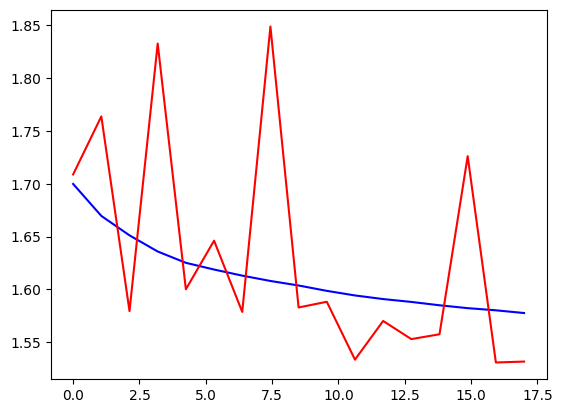

Epoch:18
-----------------------
Loss:1.689835 [    0/ 8493]
Loss:1.567166 [ 3200/ 8493]
Loss:1.457701 [ 6400/ 8493]
Test Error: 
 Accuracy: 51.6%, Avg loss: 1.528424 

Saved Successfully!!



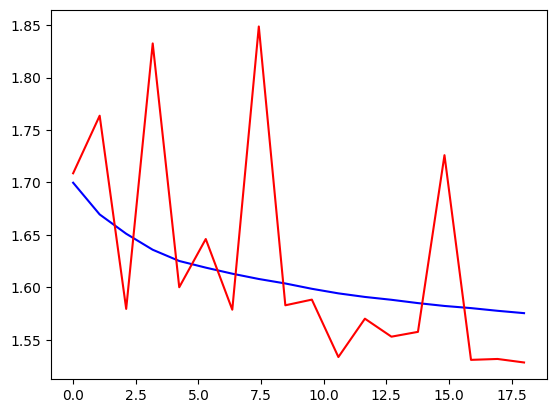

Epoch:19
-----------------------
Loss:1.488755 [    0/ 8493]
Loss:1.480554 [ 3200/ 8493]
Loss:1.569852 [ 6400/ 8493]
Test Error: 
 Accuracy: 45.4%, Avg loss: 1.586535 



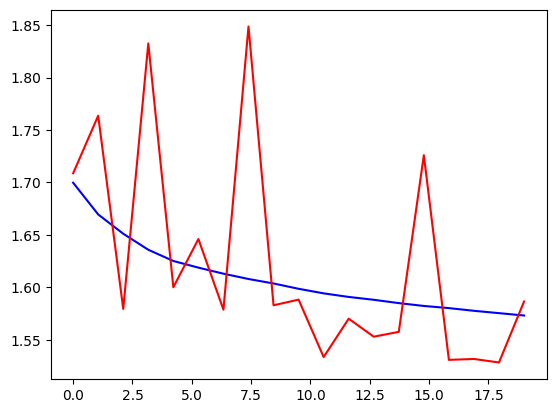

Epoch:20
-----------------------
Loss:1.611267 [    0/ 8493]
Loss:1.441678 [ 3200/ 8493]
Loss:1.589873 [ 6400/ 8493]
Test Error: 
 Accuracy: 49.7%, Avg loss: 1.543244 



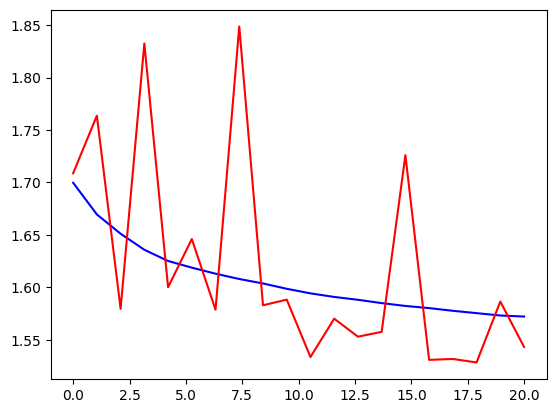

Epoch:21
-----------------------
Loss:1.463778 [    0/ 8493]
Loss:1.344524 [ 3200/ 8493]
Loss:1.442245 [ 6400/ 8493]
Test Error: 
 Accuracy: 42.3%, Avg loss: 1.613584 



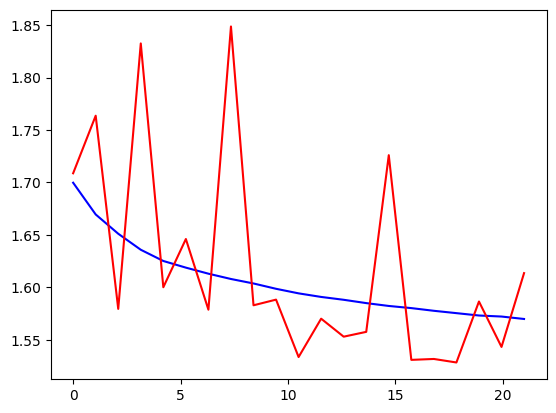

Epoch:22
-----------------------
Loss:1.524025 [    0/ 8493]
Loss:1.608791 [ 3200/ 8493]
Loss:1.566105 [ 6400/ 8493]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.515997 

Saved Successfully!!



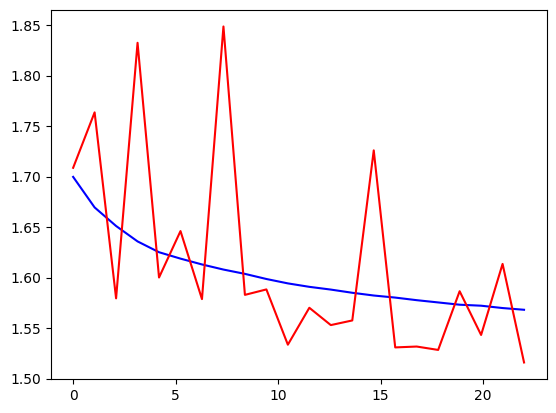

Epoch:23
-----------------------
Loss:1.606182 [    0/ 8493]
Loss:1.587164 [ 3200/ 8493]
Loss:1.700994 [ 6400/ 8493]
Test Error: 
 Accuracy: 43.1%, Avg loss: 1.610049 



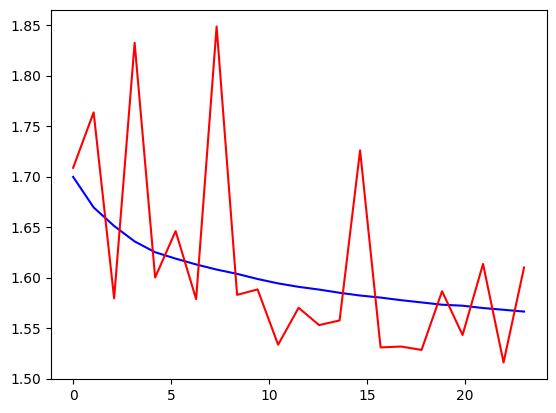

Epoch:24
-----------------------
Loss:1.450905 [    0/ 8493]
Loss:1.726966 [ 3200/ 8493]
Loss:1.464147 [ 6400/ 8493]
Test Error: 
 Accuracy: 48.0%, Avg loss: 1.559786 



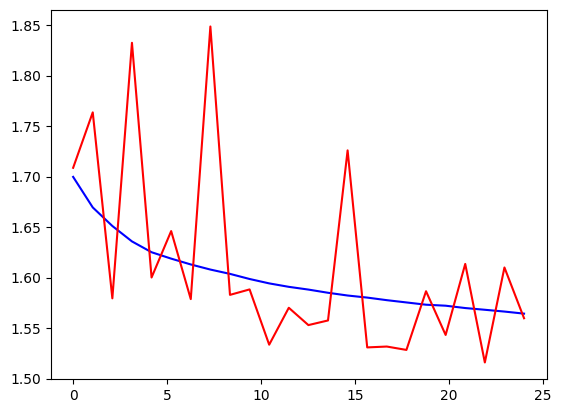

Epoch:25
-----------------------
Loss:1.546527 [    0/ 8493]
Loss:1.452241 [ 3200/ 8493]
Loss:1.434904 [ 6400/ 8493]
Test Error: 
 Accuracy: 51.4%, Avg loss: 1.527979 



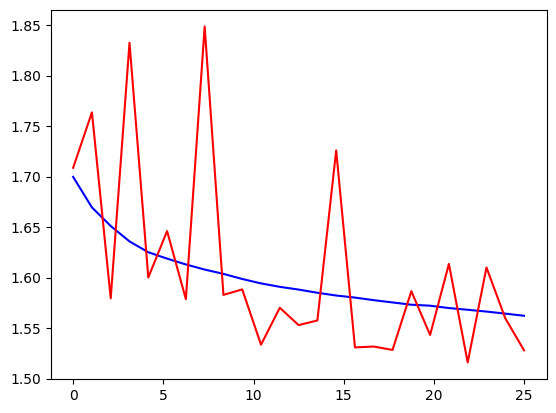

Epoch:26
-----------------------
Loss:1.348342 [    0/ 8493]
Loss:1.582086 [ 3200/ 8493]
Loss:1.532273 [ 6400/ 8493]
Test Error: 
 Accuracy: 49.6%, Avg loss: 1.543816 



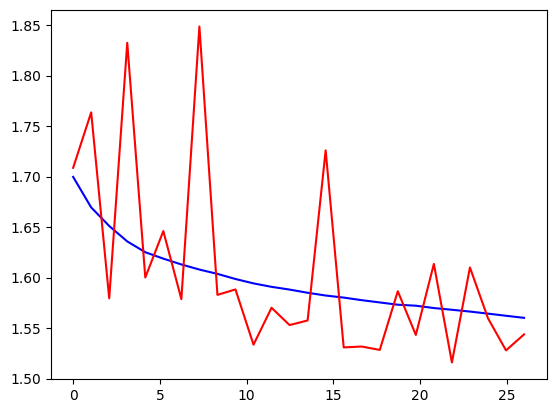

Epoch:27
-----------------------
Loss:1.539074 [    0/ 8493]
Loss:1.307234 [ 3200/ 8493]
Loss:1.454670 [ 6400/ 8493]
Test Error: 
 Accuracy: 53.2%, Avg loss: 1.510298 

Saved Successfully!!



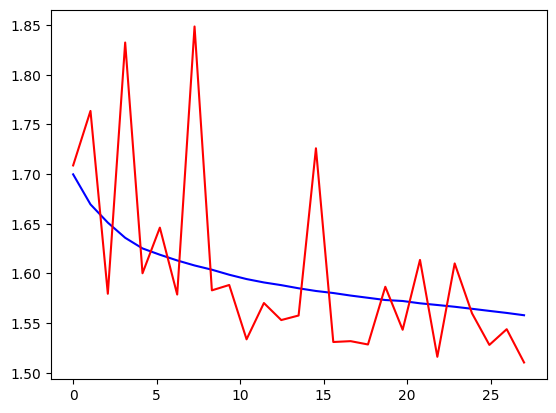

Epoch:28
-----------------------
Loss:1.610561 [    0/ 8493]
Loss:1.436350 [ 3200/ 8493]
Loss:1.420706 [ 6400/ 8493]
Test Error: 
 Accuracy: 48.1%, Avg loss: 1.558986 



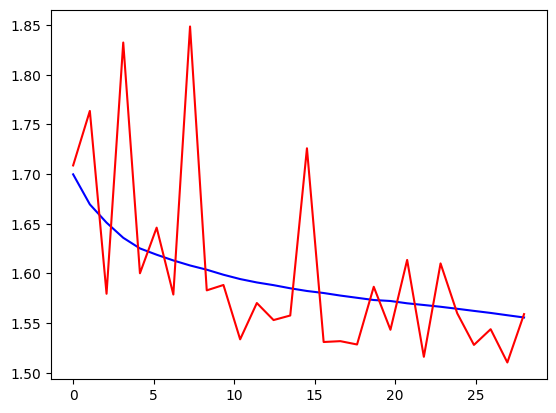

Epoch:29
-----------------------
Loss:1.574075 [    0/ 8493]
Loss:1.538411 [ 3200/ 8493]
Loss:1.490332 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.483323 

Saved Successfully!!



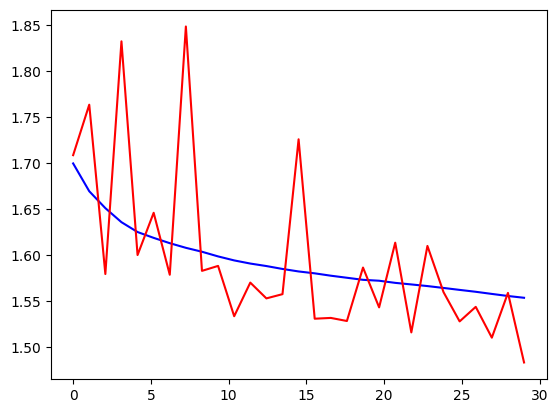

Epoch:30
-----------------------
Loss:1.452428 [    0/ 8493]
Loss:1.578005 [ 3200/ 8493]
Loss:1.378635 [ 6400/ 8493]
Test Error: 
 Accuracy: 19.5%, Avg loss: 1.849640 



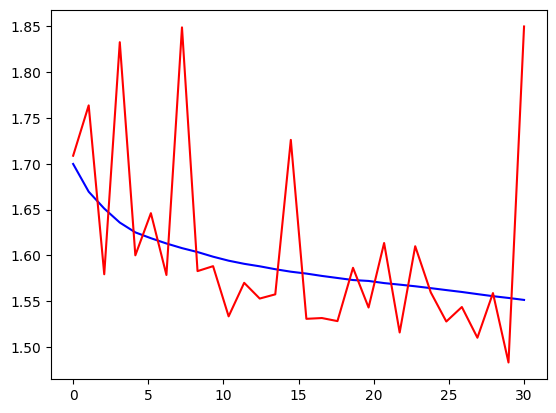

Epoch:31
-----------------------
Loss:1.420194 [    0/ 8493]
Loss:1.316546 [ 3200/ 8493]
Loss:1.473129 [ 6400/ 8493]
Test Error: 
 Accuracy: 30.3%, Avg loss: 1.740737 



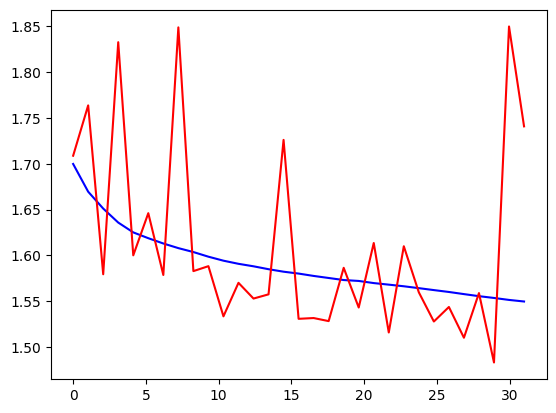

Epoch:32
-----------------------
Loss:1.537288 [    0/ 8493]
Loss:1.417823 [ 3200/ 8493]
Loss:1.630991 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.1%, Avg loss: 1.490172 



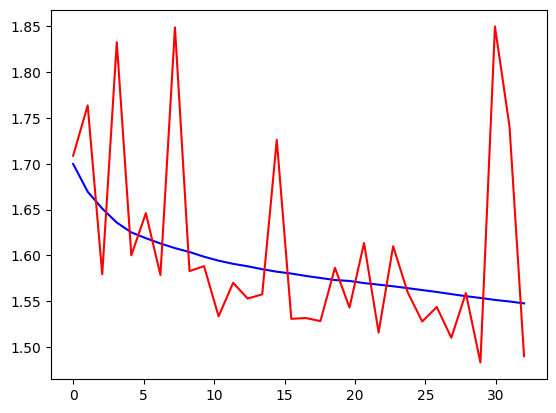

Epoch:33
-----------------------
Loss:1.500959 [    0/ 8493]
Loss:1.507098 [ 3200/ 8493]
Loss:1.487027 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.2%, Avg loss: 1.497895 



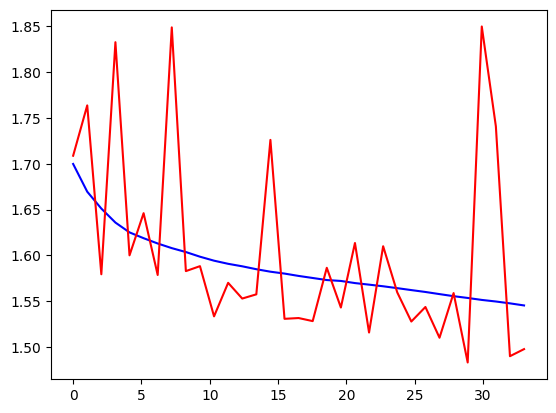

Epoch:34
-----------------------
Loss:1.431830 [    0/ 8493]
Loss:1.529126 [ 3200/ 8493]
Loss:1.526472 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.2%, Avg loss: 1.501026 



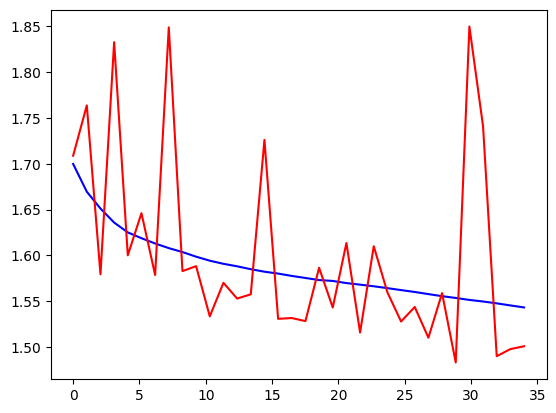

Epoch:35
-----------------------
Loss:1.686545 [    0/ 8493]
Loss:1.495937 [ 3200/ 8493]
Loss:1.532281 [ 6400/ 8493]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.543501 



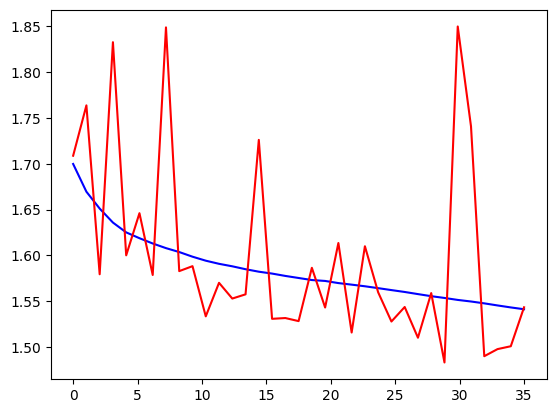

Epoch:36
-----------------------
Loss:1.510189 [    0/ 8493]
Loss:1.497488 [ 3200/ 8493]
Loss:1.558210 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.5%, Avg loss: 1.495456 



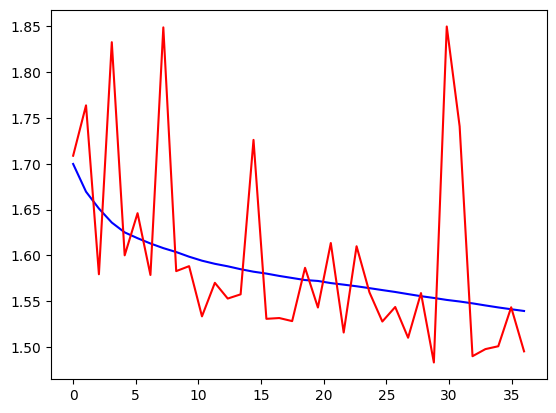

Epoch:37
-----------------------
Loss:1.536677 [    0/ 8493]
Loss:1.437513 [ 3200/ 8493]
Loss:1.452093 [ 6400/ 8493]
Test Error: 
 Accuracy: 45.7%, Avg loss: 1.585064 



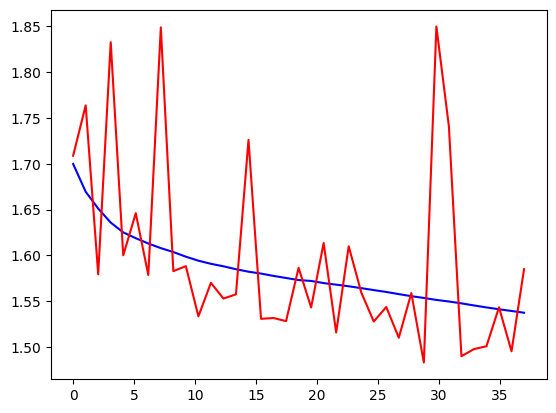

Epoch:38
-----------------------
Loss:1.475783 [    0/ 8493]
Loss:1.563473 [ 3200/ 8493]
Loss:1.336899 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.5%, Avg loss: 1.496942 



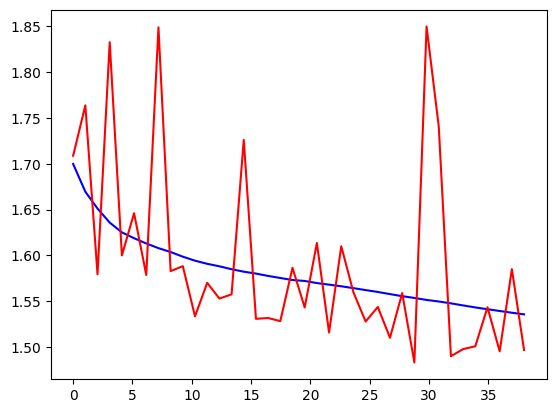

Epoch:39
-----------------------
Loss:1.359617 [    0/ 8493]
Loss:1.410899 [ 3200/ 8493]
Loss:1.362113 [ 6400/ 8493]
Test Error: 
 Accuracy: 26.8%, Avg loss: 1.776654 



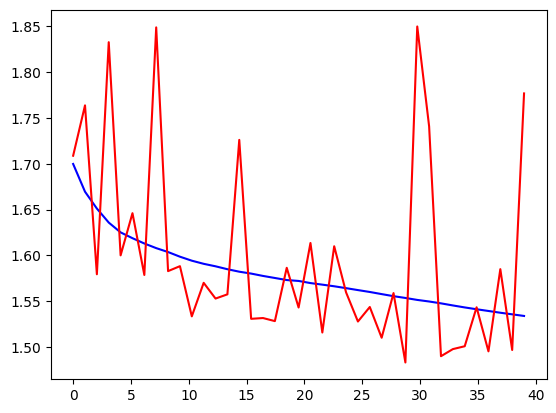

Epoch:40
-----------------------
Loss:1.423356 [    0/ 8493]
Loss:1.577735 [ 3200/ 8493]
Loss:1.376053 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.474162 

Saved Successfully!!



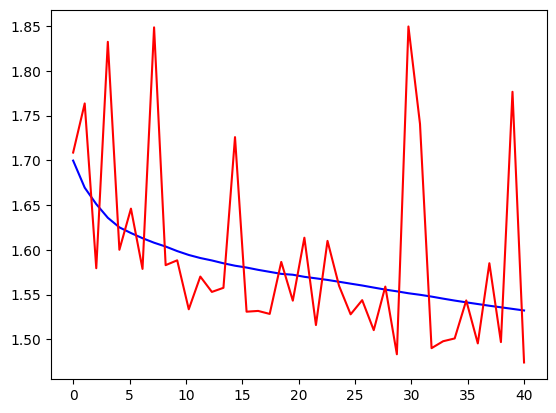

Epoch:41
-----------------------
Loss:1.507404 [    0/ 8493]
Loss:1.522564 [ 3200/ 8493]
Loss:1.481951 [ 6400/ 8493]
Test Error: 
 Accuracy: 25.6%, Avg loss: 1.788019 



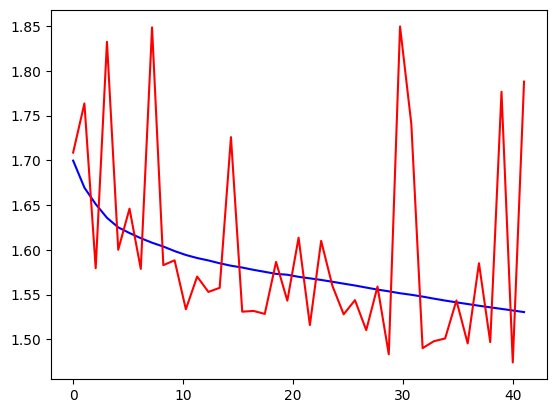

Epoch:42
-----------------------
Loss:1.455770 [    0/ 8493]
Loss:1.608082 [ 3200/ 8493]
Loss:1.484725 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.476019 



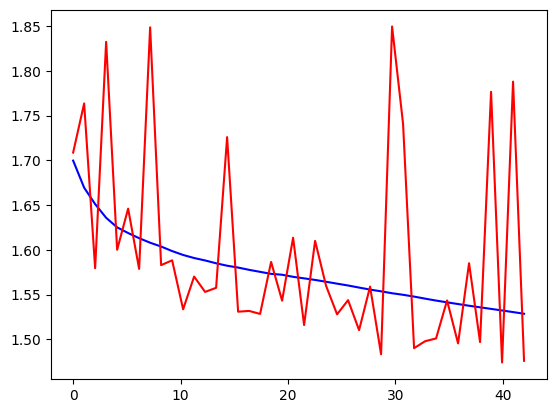

Epoch:43
-----------------------
Loss:1.325383 [    0/ 8493]
Loss:1.549965 [ 3200/ 8493]
Loss:1.356798 [ 6400/ 8493]
Test Error: 
 Accuracy: 29.9%, Avg loss: 1.743236 



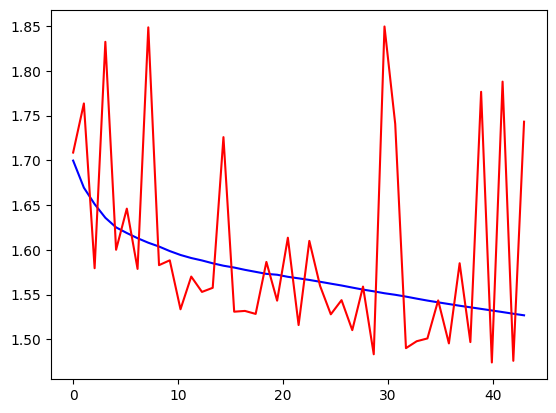

Epoch:44
-----------------------
Loss:1.356622 [    0/ 8493]
Loss:1.503066 [ 3200/ 8493]
Loss:1.390556 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.492941 



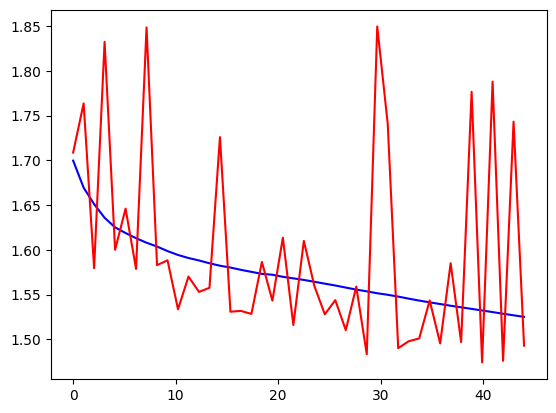

Epoch:45
-----------------------
Loss:1.401728 [    0/ 8493]
Loss:1.496496 [ 3200/ 8493]
Loss:1.418594 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.3%, Avg loss: 1.476845 



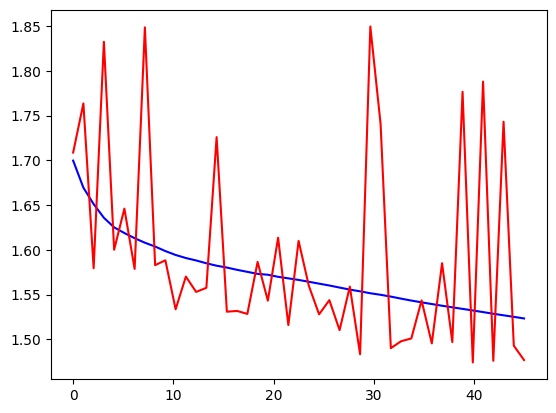

Epoch:46
-----------------------
Loss:1.417406 [    0/ 8493]
Loss:1.421225 [ 3200/ 8493]
Loss:1.401260 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.5%, Avg loss: 1.478960 



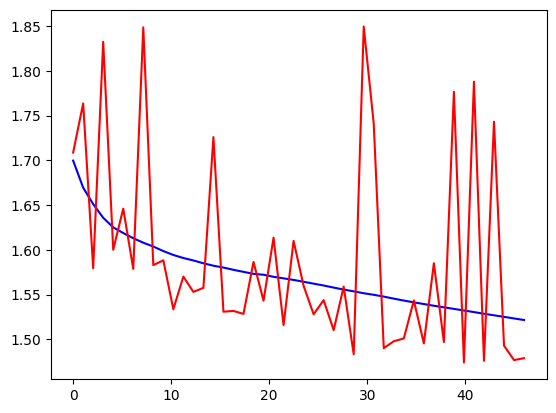

Epoch:47
-----------------------
Loss:1.425091 [    0/ 8493]
Loss:1.479645 [ 3200/ 8493]
Loss:1.530264 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.2%, Avg loss: 1.469677 

Saved Successfully!!



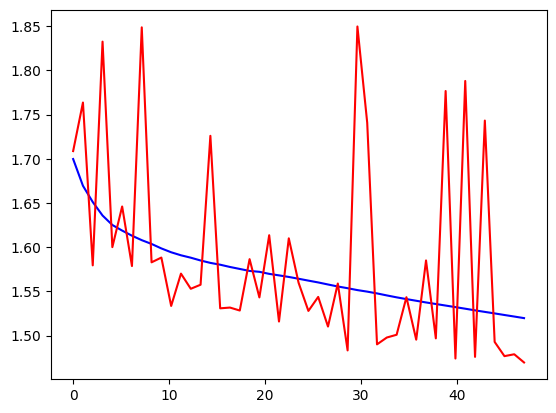

Epoch:48
-----------------------
Loss:1.479300 [    0/ 8493]
Loss:1.416975 [ 3200/ 8493]
Loss:1.469908 [ 6400/ 8493]
Test Error: 
 Accuracy: 30.4%, Avg loss: 1.737660 



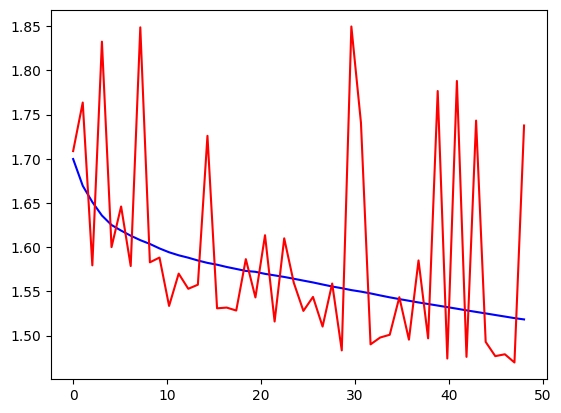

Epoch:49
-----------------------
Loss:1.396135 [    0/ 8493]
Loss:1.476822 [ 3200/ 8493]
Loss:1.484758 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.2%, Avg loss: 1.477918 



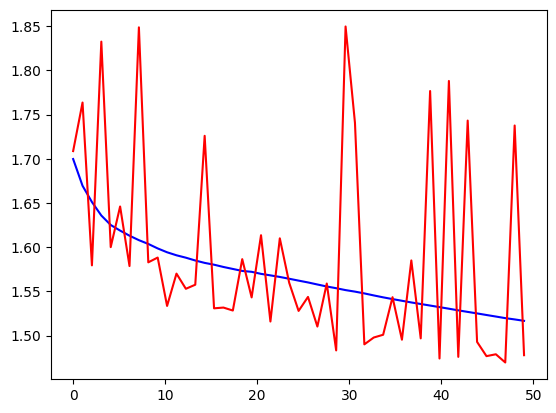

Epoch:50
-----------------------
Loss:1.390614 [    0/ 8493]
Loss:1.326025 [ 3200/ 8493]
Loss:1.394477 [ 6400/ 8493]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.515500 



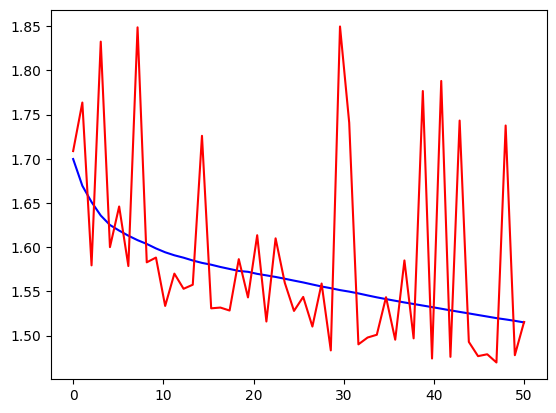

Epoch:51
-----------------------
Loss:1.593591 [    0/ 8493]
Loss:1.411615 [ 3200/ 8493]
Loss:1.426701 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.457256 

Saved Successfully!!



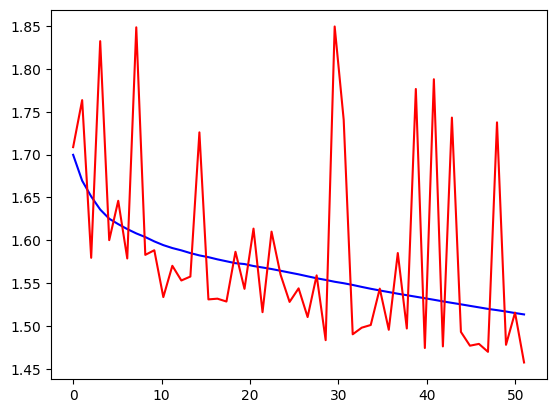

Epoch:52
-----------------------
Loss:1.503834 [    0/ 8493]
Loss:1.336531 [ 3200/ 8493]
Loss:1.440656 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.3%, Avg loss: 1.455771 



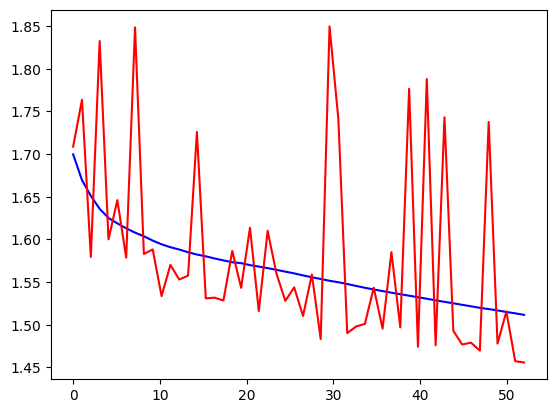

Epoch:53
-----------------------
Loss:1.384359 [    0/ 8493]
Loss:1.392618 [ 3200/ 8493]
Loss:1.330310 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.453054 

Saved Successfully!!



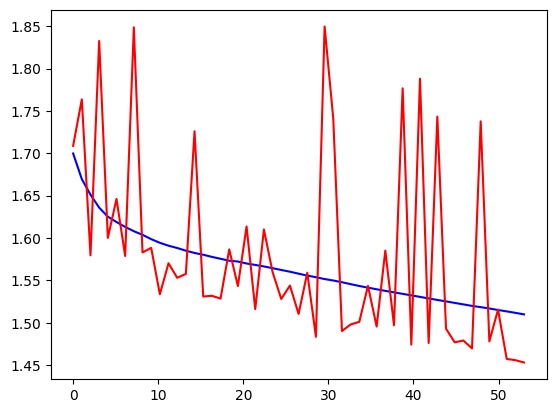

Epoch:54
-----------------------
Loss:1.411027 [    0/ 8493]
Loss:1.360250 [ 3200/ 8493]
Loss:1.345820 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.468824 



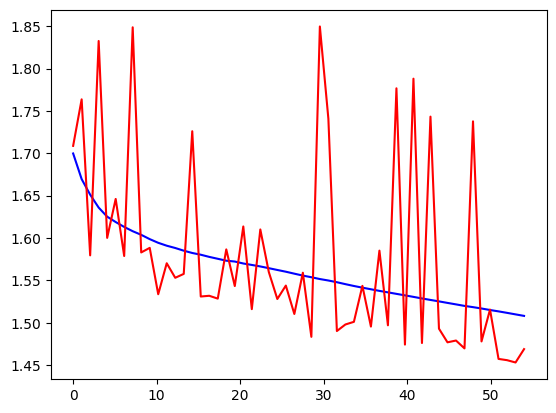

Epoch:55
-----------------------
Loss:1.361502 [    0/ 8493]
Loss:1.387676 [ 3200/ 8493]
Loss:1.356074 [ 6400/ 8493]
Test Error: 
 Accuracy: 25.1%, Avg loss: 1.792706 



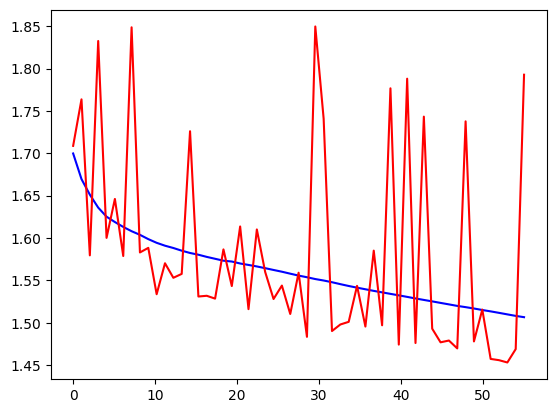

Epoch:56
-----------------------
Loss:1.402652 [    0/ 8493]
Loss:1.469163 [ 3200/ 8493]
Loss:1.454440 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.444254 

Saved Successfully!!



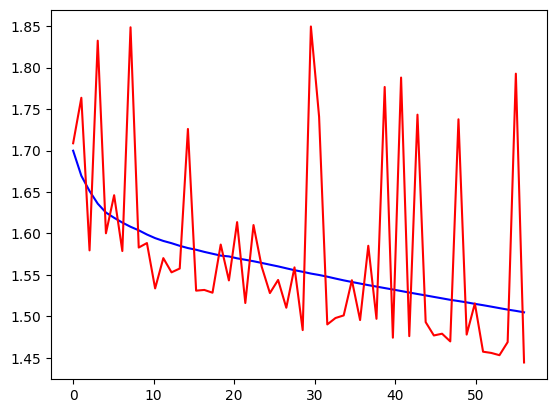

Epoch:57
-----------------------
Loss:1.483614 [    0/ 8493]
Loss:1.347781 [ 3200/ 8493]
Loss:1.473428 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.477153 



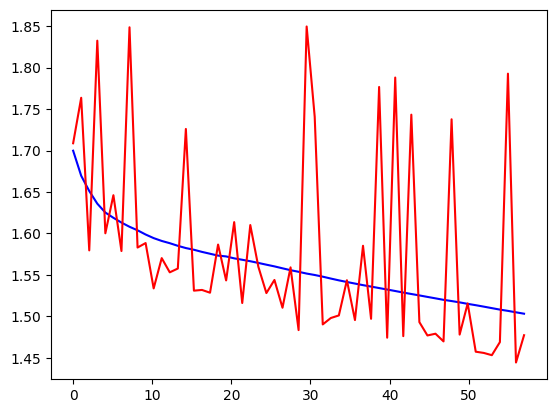

Epoch:58
-----------------------
Loss:1.354892 [    0/ 8493]
Loss:1.312261 [ 3200/ 8493]
Loss:1.272955 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.470929 



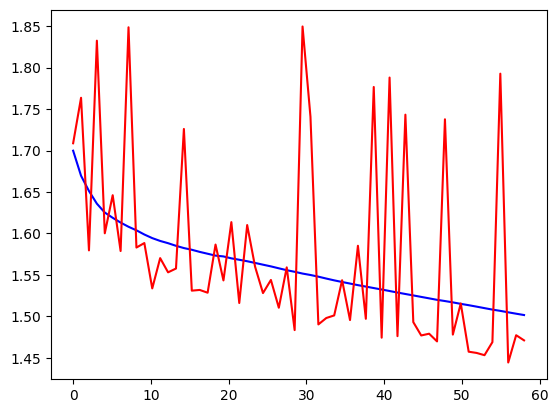

Epoch:59
-----------------------
Loss:1.494133 [    0/ 8493]
Loss:1.409193 [ 3200/ 8493]
Loss:1.486922 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.452587 



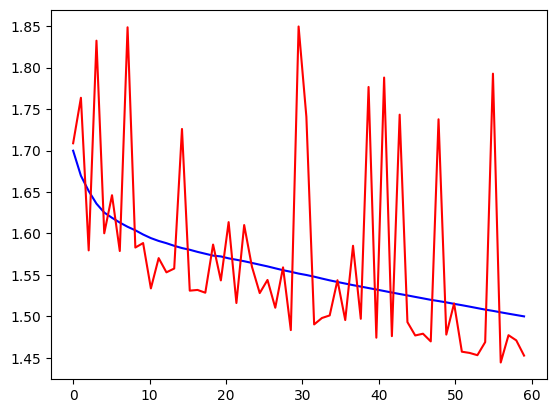

Epoch:60
-----------------------
Loss:1.225270 [    0/ 8493]
Loss:1.409679 [ 3200/ 8493]
Loss:1.391473 [ 6400/ 8493]
Test Error: 
 Accuracy: 51.4%, Avg loss: 1.523621 



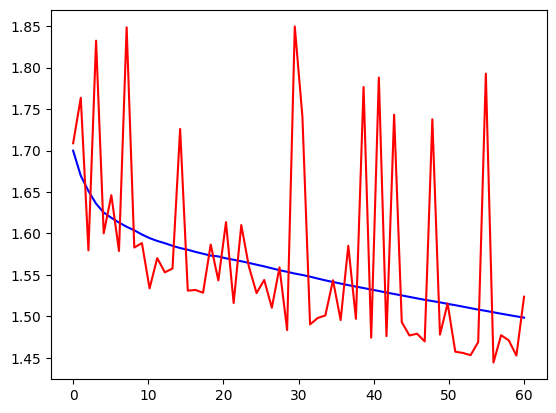

Epoch:61
-----------------------
Loss:1.402839 [    0/ 8493]
Loss:1.413711 [ 3200/ 8493]
Loss:1.362829 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.2%, Avg loss: 1.459942 



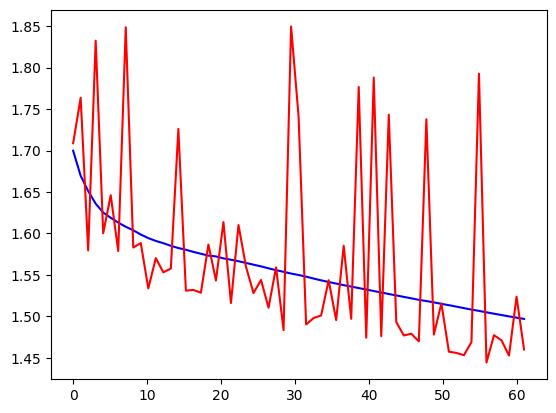

Epoch:62
-----------------------
Loss:1.566227 [    0/ 8493]
Loss:1.350350 [ 3200/ 8493]
Loss:1.399164 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.450652 



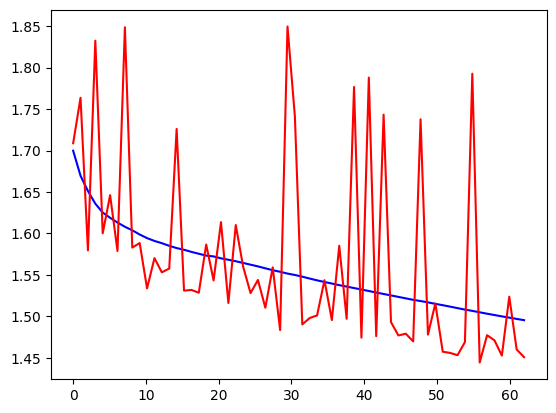

Epoch:63
-----------------------
Loss:1.380388 [    0/ 8493]
Loss:1.359953 [ 3200/ 8493]
Loss:1.289816 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.464313 



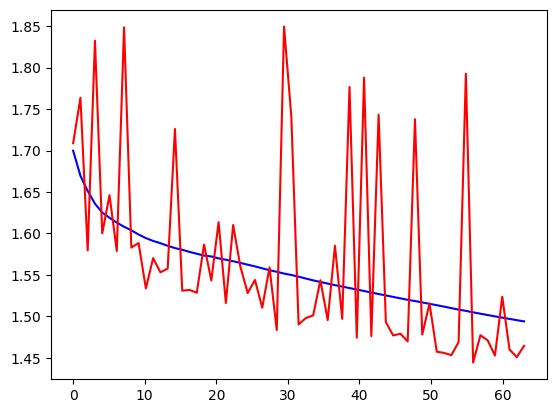

Epoch:64
-----------------------
Loss:1.328034 [    0/ 8493]
Loss:1.425375 [ 3200/ 8493]
Loss:1.514915 [ 6400/ 8493]
Test Error: 
 Accuracy: 55.4%, Avg loss: 1.491457 



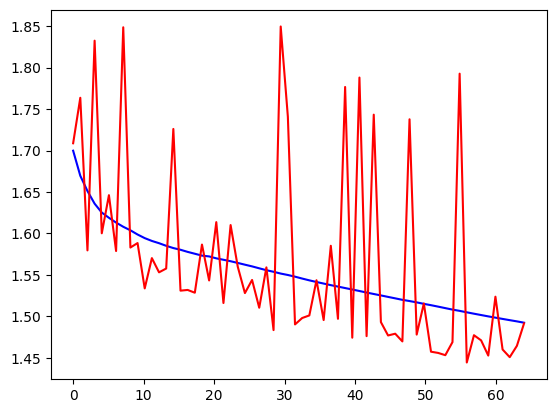

Epoch:65
-----------------------
Loss:1.310852 [    0/ 8493]
Loss:1.589270 [ 3200/ 8493]
Loss:1.503699 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.447542 



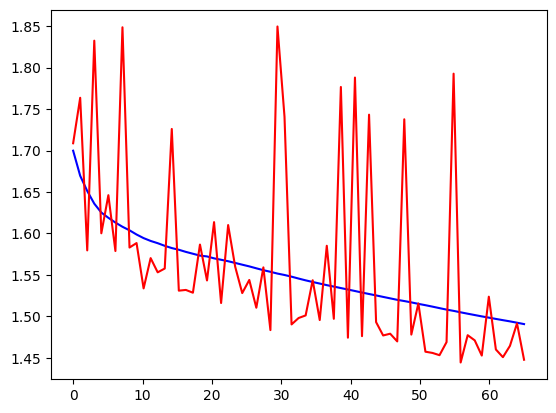

Epoch:66
-----------------------
Loss:1.436878 [    0/ 8493]
Loss:1.398680 [ 3200/ 8493]
Loss:1.452896 [ 6400/ 8493]
Test Error: 
 Accuracy: 32.7%, Avg loss: 1.716659 



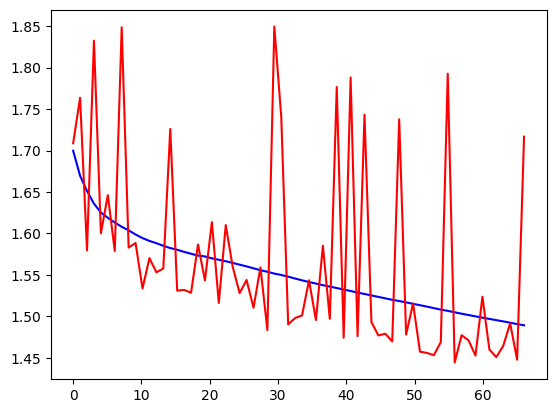

Epoch:67
-----------------------
Loss:1.608529 [    0/ 8493]
Loss:1.327097 [ 3200/ 8493]
Loss:1.378669 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.5%, Avg loss: 1.477027 



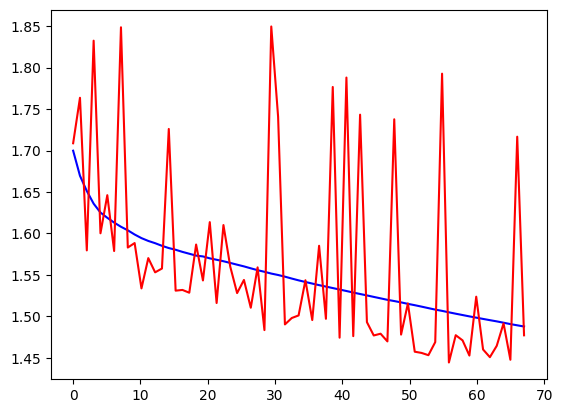

Epoch:68
-----------------------
Loss:1.266465 [    0/ 8493]
Loss:1.383856 [ 3200/ 8493]
Loss:1.363955 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.7%, Avg loss: 1.476147 



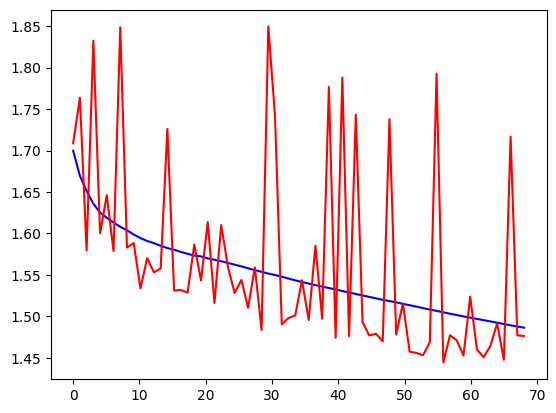

Epoch:69
-----------------------
Loss:1.360688 [    0/ 8493]
Loss:1.343988 [ 3200/ 8493]
Loss:1.358092 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.455667 



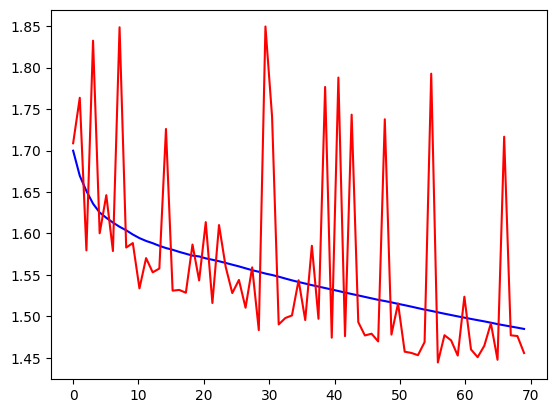

Epoch:70
-----------------------
Loss:1.467864 [    0/ 8493]
Loss:1.563122 [ 3200/ 8493]
Loss:1.314035 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.464197 



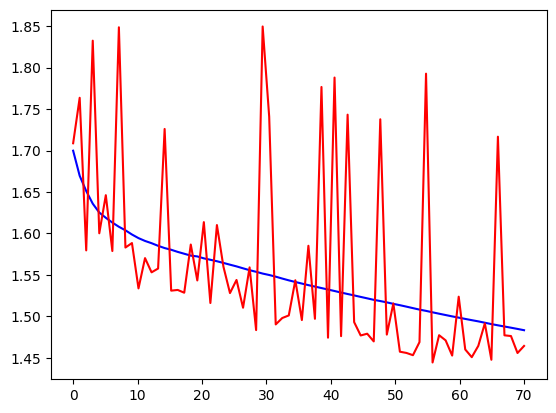

Epoch:71
-----------------------
Loss:1.441618 [    0/ 8493]
Loss:1.438772 [ 3200/ 8493]
Loss:1.306777 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.455423 



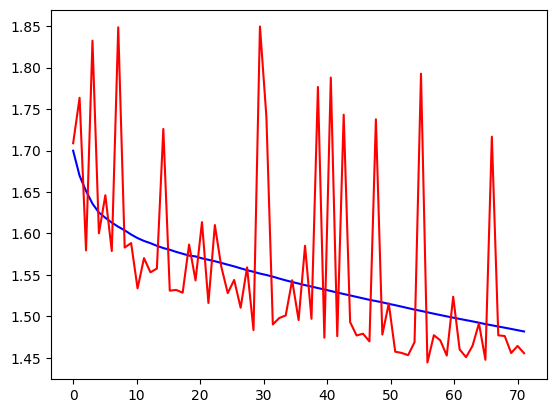

Epoch:72
-----------------------
Loss:1.333989 [    0/ 8493]
Loss:1.287827 [ 3200/ 8493]
Loss:1.503029 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.448871 



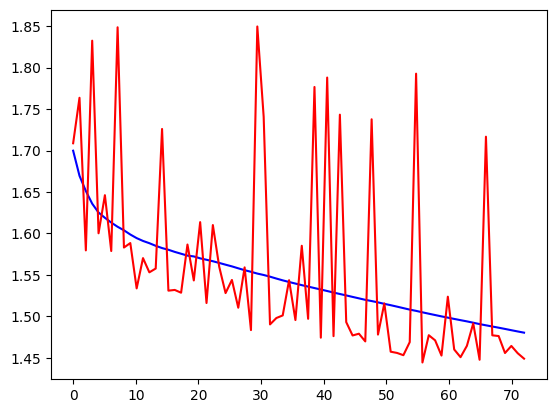

Epoch:73
-----------------------
Loss:1.484886 [    0/ 8493]
Loss:1.359439 [ 3200/ 8493]
Loss:1.477452 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.462022 



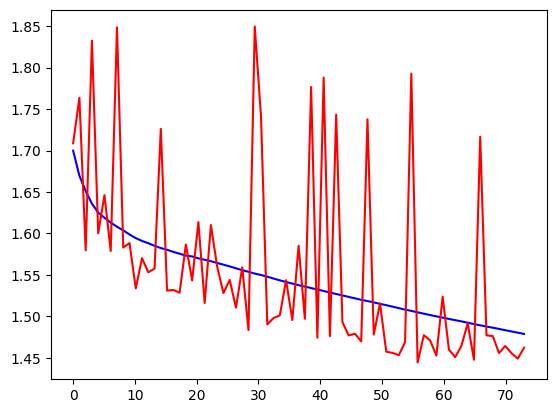

Epoch:74
-----------------------
Loss:1.300016 [    0/ 8493]
Loss:1.383667 [ 3200/ 8493]
Loss:1.267996 [ 6400/ 8493]
Test Error: 
 Accuracy: 30.1%, Avg loss: 1.743456 



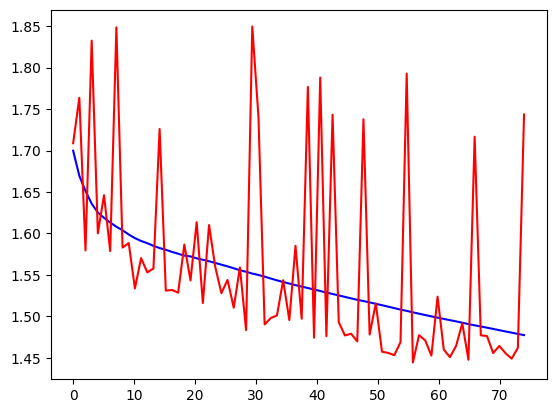

Epoch:75
-----------------------
Loss:1.371544 [    0/ 8493]
Loss:1.471484 [ 3200/ 8493]
Loss:1.362556 [ 6400/ 8493]
Test Error: 
 Accuracy: 54.0%, Avg loss: 1.501092 



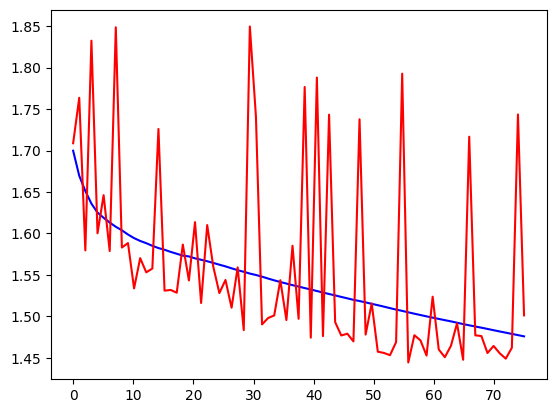

Epoch:76
-----------------------
Loss:1.317963 [    0/ 8493]
Loss:1.323947 [ 3200/ 8493]
Loss:1.449221 [ 6400/ 8493]
Test Error: 
 Accuracy: 56.9%, Avg loss: 1.469754 



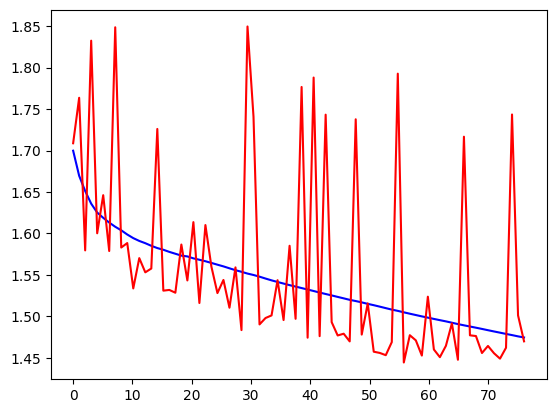

Epoch:77
-----------------------
Loss:1.447978 [    0/ 8493]
Loss:1.455604 [ 3200/ 8493]
Loss:1.373617 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.464001 



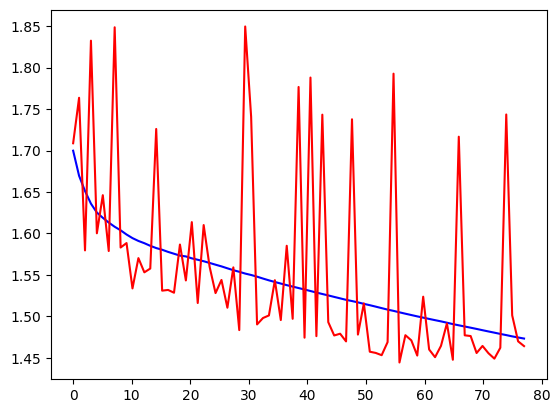

Epoch:78
-----------------------
Loss:1.379409 [    0/ 8493]
Loss:1.424284 [ 3200/ 8493]
Loss:1.394306 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.2%, Avg loss: 1.434441 

Saved Successfully!!



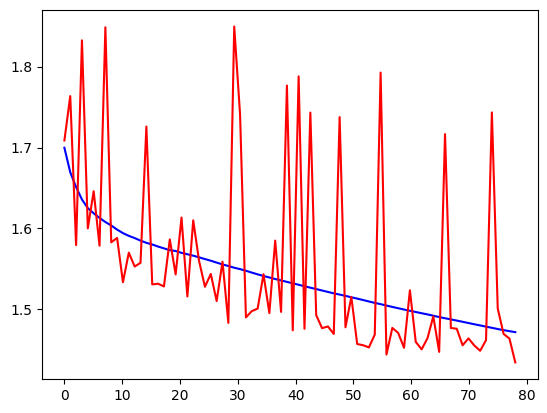

Epoch:79
-----------------------
Loss:1.294988 [    0/ 8493]
Loss:1.412948 [ 3200/ 8493]
Loss:1.424282 [ 6400/ 8493]
Test Error: 
 Accuracy: 27.3%, Avg loss: 1.770896 



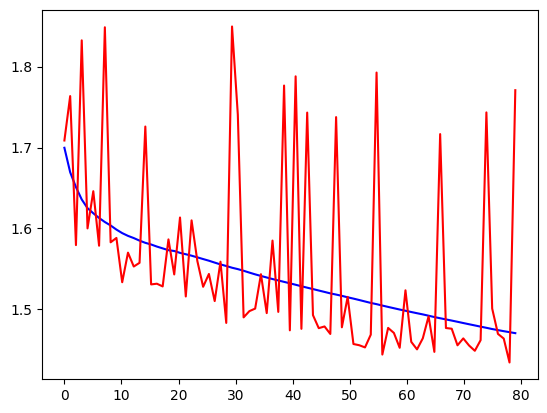

Epoch:80
-----------------------
Loss:1.390260 [    0/ 8493]
Loss:1.320795 [ 3200/ 8493]
Loss:1.367189 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.8%, Avg loss: 1.423681 

Saved Successfully!!



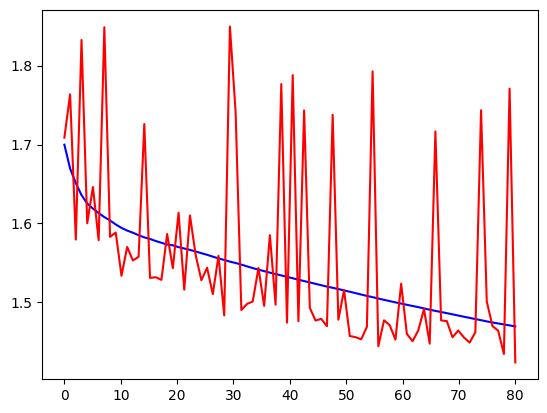

Epoch:81
-----------------------
Loss:1.436805 [    0/ 8493]
Loss:1.572756 [ 3200/ 8493]
Loss:1.263864 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.439738 



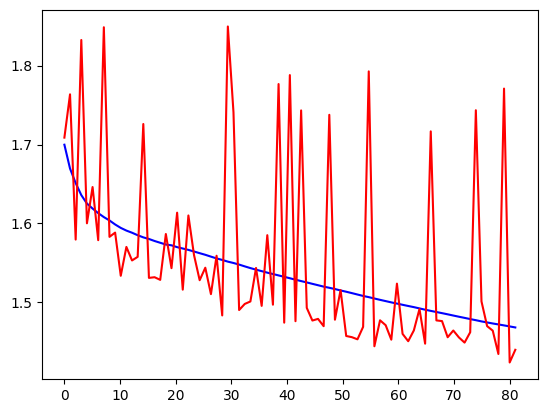

Epoch:82
-----------------------
Loss:1.491575 [    0/ 8493]
Loss:1.387675 [ 3200/ 8493]
Loss:1.356406 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.7%, Avg loss: 1.454476 



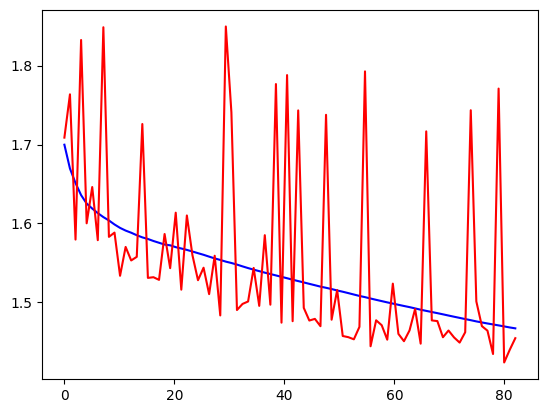

Epoch:83
-----------------------
Loss:1.306935 [    0/ 8493]
Loss:1.425681 [ 3200/ 8493]
Loss:1.296650 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.7%, Avg loss: 1.426871 



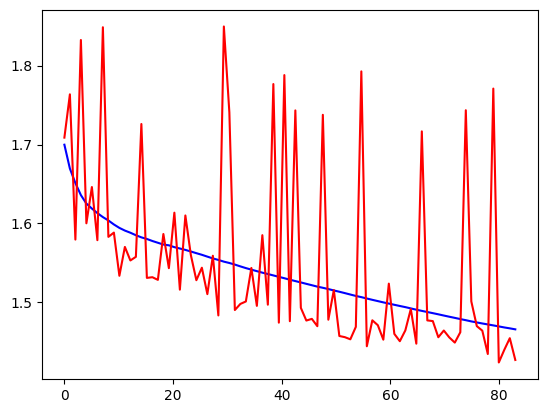

Epoch:84
-----------------------
Loss:1.293651 [    0/ 8493]
Loss:1.228344 [ 3200/ 8493]
Loss:1.415238 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.2%, Avg loss: 1.431248 



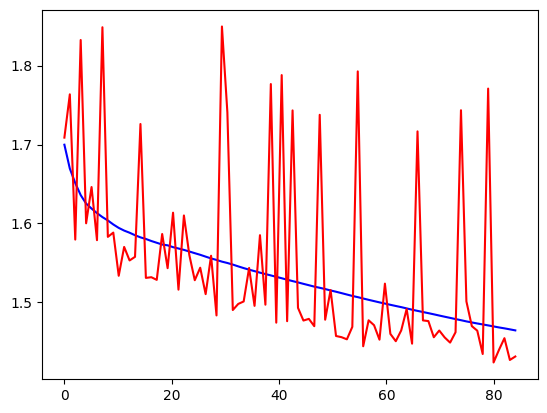

Epoch:85
-----------------------
Loss:1.382989 [    0/ 8493]
Loss:1.510622 [ 3200/ 8493]
Loss:1.416011 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.6%, Avg loss: 1.464605 



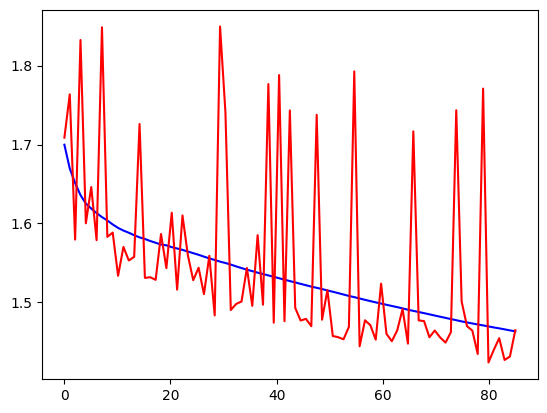

Epoch:86
-----------------------
Loss:1.383907 [    0/ 8493]
Loss:1.322878 [ 3200/ 8493]
Loss:1.293557 [ 6400/ 8493]
Test Error: 
 Accuracy: 42.0%, Avg loss: 1.621903 



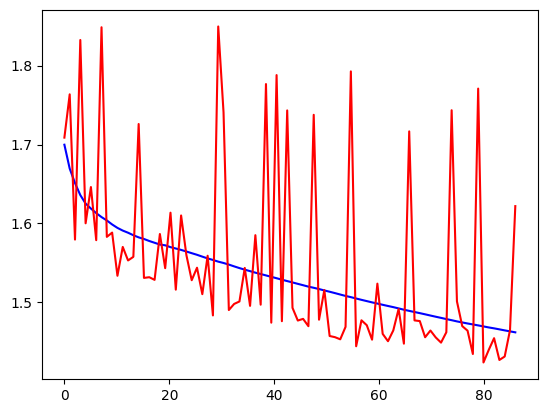

Epoch:87
-----------------------
Loss:1.361239 [    0/ 8493]
Loss:1.481229 [ 3200/ 8493]
Loss:1.514967 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.438498 



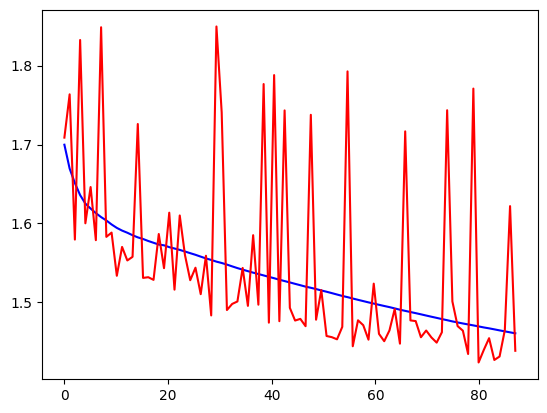

Epoch:88
-----------------------
Loss:1.585826 [    0/ 8493]
Loss:1.261215 [ 3200/ 8493]
Loss:1.415212 [ 6400/ 8493]
Test Error: 
 Accuracy: 49.7%, Avg loss: 1.545086 



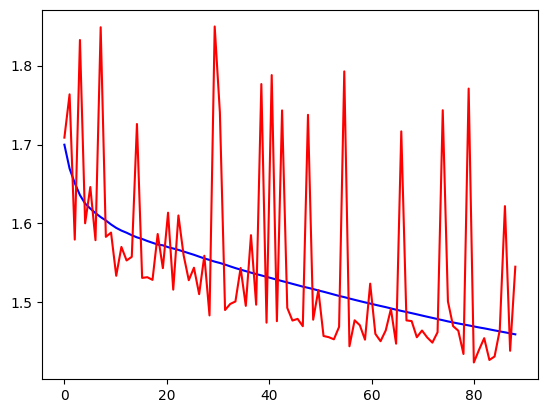

Epoch:89
-----------------------
Loss:1.363780 [    0/ 8493]
Loss:1.275489 [ 3200/ 8493]
Loss:1.380904 [ 6400/ 8493]
Test Error: 
 Accuracy: 62.4%, Avg loss: 1.420015 

Saved Successfully!!



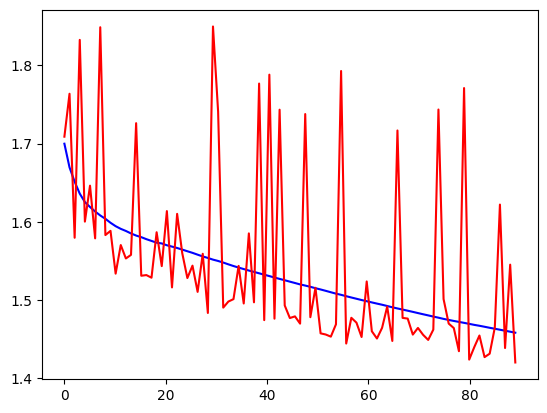

Epoch:90
-----------------------
Loss:1.511450 [    0/ 8493]
Loss:1.366747 [ 3200/ 8493]
Loss:1.324850 [ 6400/ 8493]
Test Error: 
 Accuracy: 62.3%, Avg loss: 1.418848 



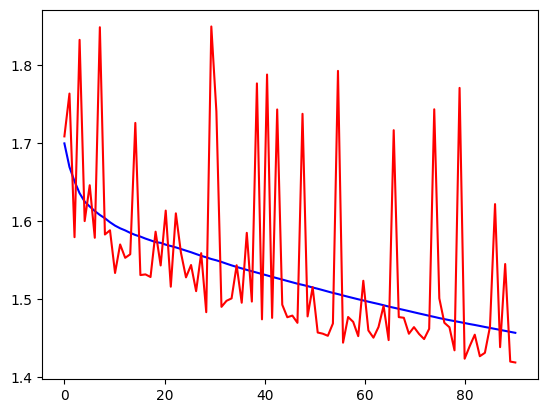

Epoch:91
-----------------------
Loss:1.344652 [    0/ 8493]
Loss:1.278006 [ 3200/ 8493]
Loss:1.282965 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.0%, Avg loss: 1.432909 



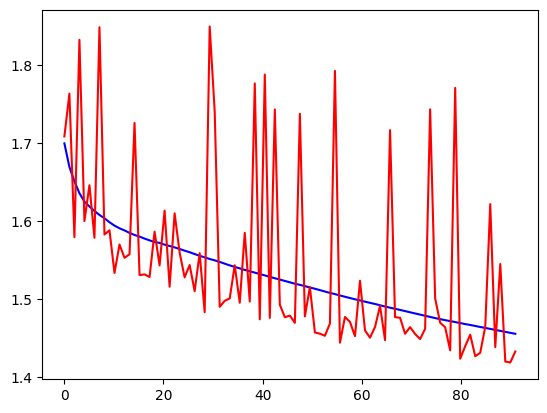

Epoch:92
-----------------------
Loss:1.325825 [    0/ 8493]
Loss:1.318482 [ 3200/ 8493]
Loss:1.478792 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.3%, Avg loss: 1.438203 



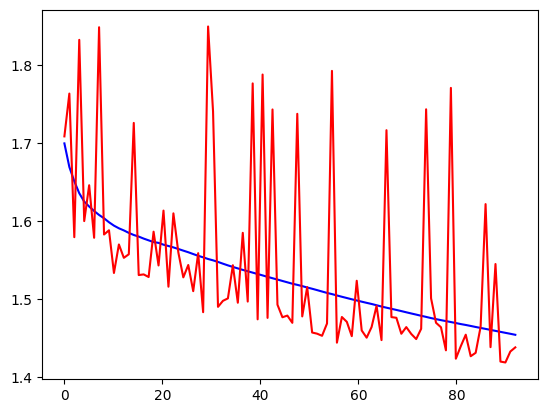

Epoch:93
-----------------------
Loss:1.366758 [    0/ 8493]
Loss:1.302193 [ 3200/ 8493]
Loss:1.323538 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.7%, Avg loss: 1.426140 



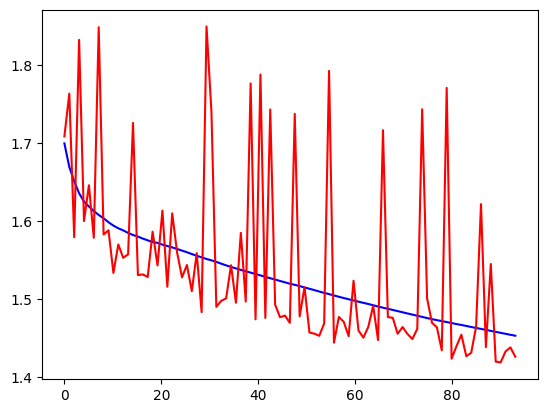

Epoch:94
-----------------------
Loss:1.480379 [    0/ 8493]
Loss:1.311550 [ 3200/ 8493]
Loss:1.532199 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.6%, Avg loss: 1.426688 



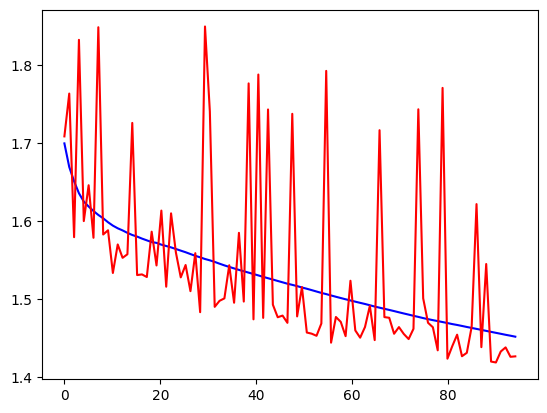

Epoch:95
-----------------------
Loss:1.268108 [    0/ 8493]
Loss:1.366683 [ 3200/ 8493]
Loss:1.230600 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.5%, Avg loss: 1.436927 



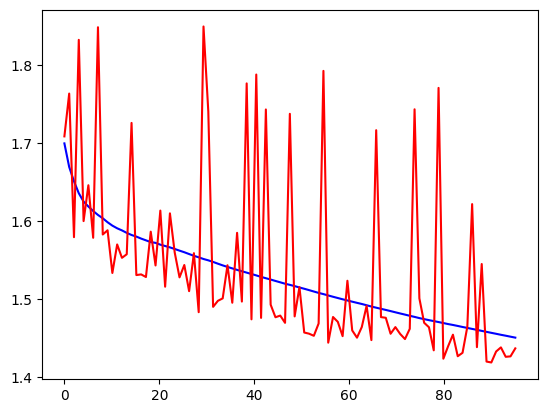

Epoch:96
-----------------------
Loss:1.324800 [    0/ 8493]
Loss:1.324879 [ 3200/ 8493]
Loss:1.433918 [ 6400/ 8493]
Test Error: 
 Accuracy: 62.3%, Avg loss: 1.420565 



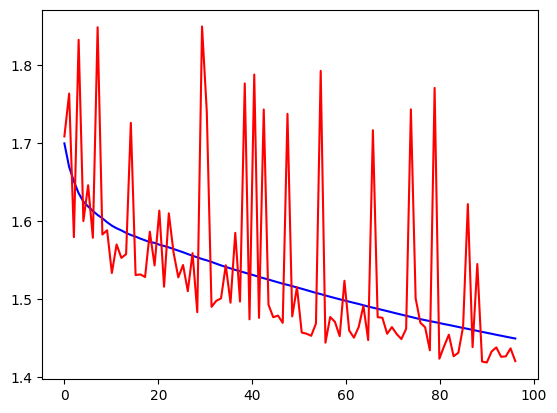

Epoch:97
-----------------------
Loss:1.274713 [    0/ 8493]
Loss:1.235781 [ 3200/ 8493]
Loss:1.293538 [ 6400/ 8493]
Test Error: 
 Accuracy: 60.7%, Avg loss: 1.432086 



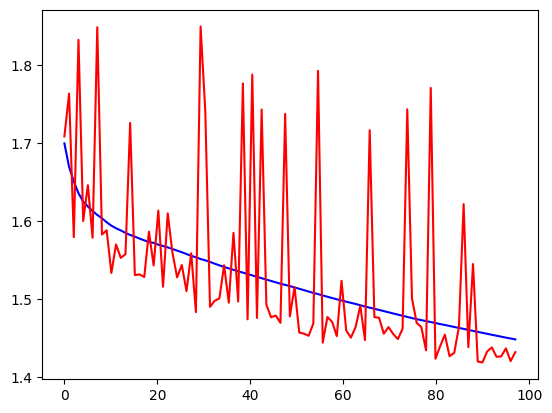

Epoch:98
-----------------------
Loss:1.293782 [    0/ 8493]
Loss:1.361404 [ 3200/ 8493]
Loss:1.327291 [ 6400/ 8493]
Test Error: 
 Accuracy: 62.2%, Avg loss: 1.418935 



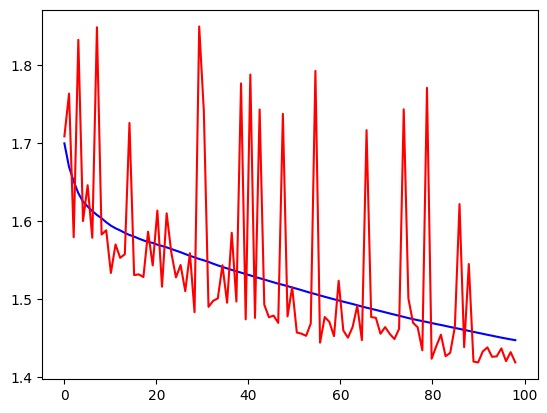

Epoch:99
-----------------------
Loss:1.329514 [    0/ 8493]
Loss:1.368912 [ 3200/ 8493]
Loss:1.348618 [ 6400/ 8493]
Test Error: 
 Accuracy: 62.2%, Avg loss: 1.417541 



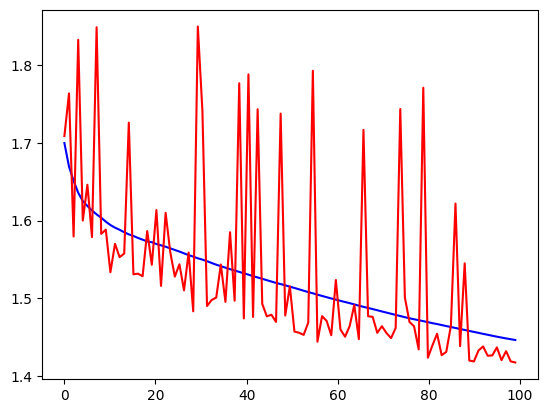

Epoch:100
-----------------------
Loss:1.232964 [    0/ 8493]
Loss:1.263562 [ 3200/ 8493]
Loss:1.339834 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.8%, Avg loss: 1.427102 



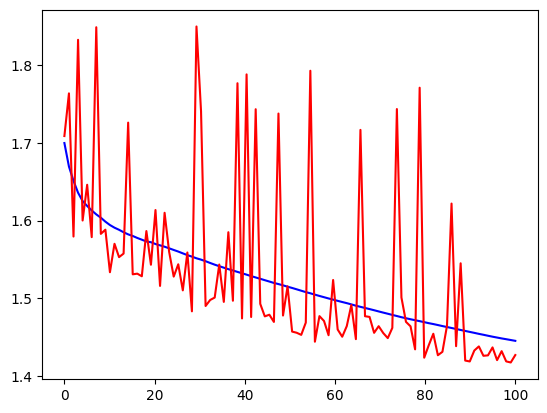

Done!!
Best Accuracy: 0.6236457842675459


In [7]:
epochs = 100
Train_Loss = []
Test_Loss = []
temp = []
for t in range(epochs):
    print(f"Epoch:{t+1}\n-----------------------")
    train(resnet101, train_dl, loss_fn, resnet101_optimizer)
    test(resnet101, test_dl, loss_fn)

    x = torch.linspace(0, len(Train_Loss), len(Train_Loss))
    plt.plot(x, Train_Loss, color='blue')
    plt.plot(x, Test_Loss, color='red')
    plt.show()
print("Done!!")
print(f"Best Accuracy: {prevAcc}")

In [8]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []
# 
resnet101.eval()
# 
with torch.no_grad():
    for image, label in test_dl:
        image = image.to(device)
        # 
        output = resnet101(image)
        # 
        _, pred = torch.max(output, 1)
        y_true.extend(label.numpy())
        y_pred.extend(pred.detach().cpu().numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)
target_names=['AMD','D','Drusen','ERM','M','N']
print(classification_report(y_true, y_pred, target_names=target_names))

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


              precision    recall  f1-score   support

         AMD       0.66      0.58      0.62       322
           D       0.42      0.81      0.56       355
      Drusen       0.62      0.75      0.68       302
         ERM       0.65      0.66      0.65       447
           M       0.92      0.98      0.95       327
           N       0.00      0.00      0.00       370

    accuracy                           0.62      2123
   macro avg       0.55      0.63      0.58      2123
weighted avg       0.54      0.62      0.57      2123



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
